# Spatial Representations and Relationships - Polygons

Regardless of the spatial data structure of interest (raster, vector, network, etc), modeling the relationship of one spatial feature with others is central to many geospatial analyses.

In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','spdep','rgeos')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'spdep' was built under R version 3.4.2"Warning message:
"package 'rgeos' was built under R version 3.4.2"

In [4]:
#Read in shp file
ppolys <- readOGR("datasets/mo_counties","st_county10")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/mo_counties", layer: "st_county10"
with 115 features
It has 46 fields
Integer64 fields read as strings:  POP90 WHITE90 BLACK90 ASIANPI90 AMIND90 OTHER90 HISP90 POP00 WHITE00 BLACK00 ASIAN00 AMIND00 HAWNPI00 OTHER00 MULTRA00 HISP00 POP10 WHITE10 BLACK10 ASIAN10 AMIND10 HAWNPI10 OTHER10 MULTRA10 HISP10 


In [5]:
peek <- head(ppolys@data)

In [6]:
t(peek)

,0,1,2,3,4,5
STATEFP10,29,29,29,29,29,29
COUNTYFP10,045,005,199,147,197,171
COUNTYNS10,00758477,00758457,00758552,00758528,00758551,00758540
GEOID10,29045,29005,29199,29147,29197,29171
NAME10,Clark,Atchison,Scotland,Nodaway,Schuyler,Putnam
NAMELSAD10,Clark County,Atchison County,Scotland County,Nodaway County,Schuyler County,Putnam County
LSAD10,06,06,06,06,06,06
CLASSFP10,H1,H1,H1,H1,H1,H1
MTFCC10,G4020,G4020,G4020,G4020,G4020,G4020
CSAFP10,NA,NA,NA,NA,NA,NA


In [7]:
data <- ppolys@data

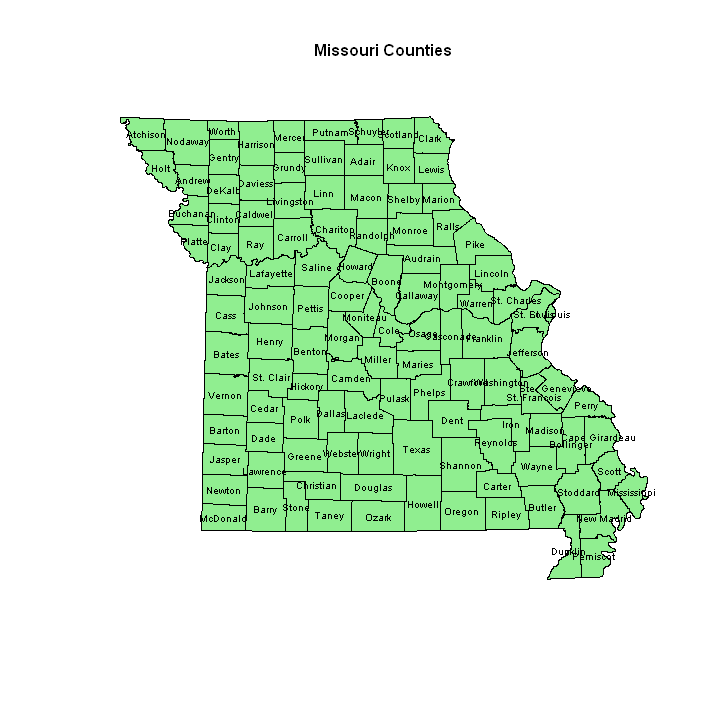

In [8]:
#Display the featureclass
plot(ppolys, col="lightgreen", main='Missouri Counties',cex.main=.8)

#Get centroid of polygons
centroids <- gCentroid(ppolys, byid=TRUE)
centroidLons <- coordinates(centroids)[,1]
centroidLats <- coordinates(centroids)[,2]

#Label polygons
text(centroidLons, centroidLats, labels=ppolys$NAME10,cex=.5)

## Neighborhoods

What areas of the state would you expect to influence a home's value? 

a) All areas of the state; 

B) Areas within a home's county; 

C) Areas within a home's city; 

E) Areas within 1 mile of a house.

In many types of spatial analysis, making assumptions regarding the size of the neighborhoods that could have some affect on a phenomena at a particular location is an important component.

Fortunately, the increasing use of geographic information systems makes assessment of different neighborhood structures a simple task. To illustrate this, let's look at some example neighborhood structures using polygon and point dataset. Here we will use the functions available in the spdep library. In the following example, the 'poly2nb' function (spdep library) will be used to generate a .nb class neighborhood object (a format used by the spdep library). Here, the 'queen=FALSE' parameter indicates that the Rook's criterion will be used to assess a polygon's neighborhood.

In [9]:
#Identify the neighbors of each polygon
ppolys.nb <- poly2nb(ppolys, queen = FALSE)

#summarize .nb object
ppolys.nb

Neighbour list object:
Number of regions: 115 
Number of nonzero links: 588 
Percentage nonzero weights: 4.446125 
Average number of links: 5.113043 

The poly2nb() function actually identifies the SET of polygons that constitute the neighborhood for each polygon. See some example ouput of the neighborhood list below. In this case, the neighbors of polygon 1 are polygons 3, 13, and 16.

In [10]:
#list first 5 neighborhood sets
head(ppolys.nb, 10)

[[1]]
[1]  3 13 16

[[2]]
[1]  4 14

[[3]]
[1]  1  5 12 13

[[4]]
[1]  2  7 10 14 17

[[5]]
[1]  3  6 12

[[6]]
[1]  5  8 11 12

[[7]]
[1]  4  9 10

[[8]]
[1]  6  9 11 15

[[9]]
[1]  7  8 10 15 18

[[10]]
[1]  4  7  9 17 18 19

### Referencing Specific Neighborhoods

For example, consider Howell County's neighborhood = {Ozark, Douglas, Texas, Oregon, Shannon}. 

To find the neighbors of Howell County: 

a) select Howell County,

b) select the row of the neighborhood file associated with Howell County. Keep in mind that the row.names() function in R returns rows with the first row indexed 0. Thus, we will need to account for that below by adding 1 to the index for the county since there is no record 0 in the dataframe.

In [11]:
# First let's look at the Howell county and its neighbors

#Read in shp file
ppolys <- readOGR("datasets/mo_counties","st_county10")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/mo_counties", layer: "st_county10"
with 115 features
It has 46 fields
Integer64 fields read as strings:  POP90 WHITE90 BLACK90 ASIANPI90 AMIND90 OTHER90 HISP90 POP00 WHITE00 BLACK00 ASIAN00 AMIND00 HAWNPI00 OTHER00 MULTRA00 HISP00 POP10 WHITE10 BLACK10 ASIAN10 AMIND10 HAWNPI10 OTHER10 MULTRA10 HISP10 


In [12]:
subset(data, NAME10 == "Howell")

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,...,HISP00,POP10,WHITE10,BLACK10,ASIAN10,AMIND10,HAWNPI10,OTHER10,MULTRA10,HISP10
103,29,091,00758500,29091,Howell,Howell County,06,H1,G4020,NA,...,450,40400,38903,156,198,270,14,202,657,697


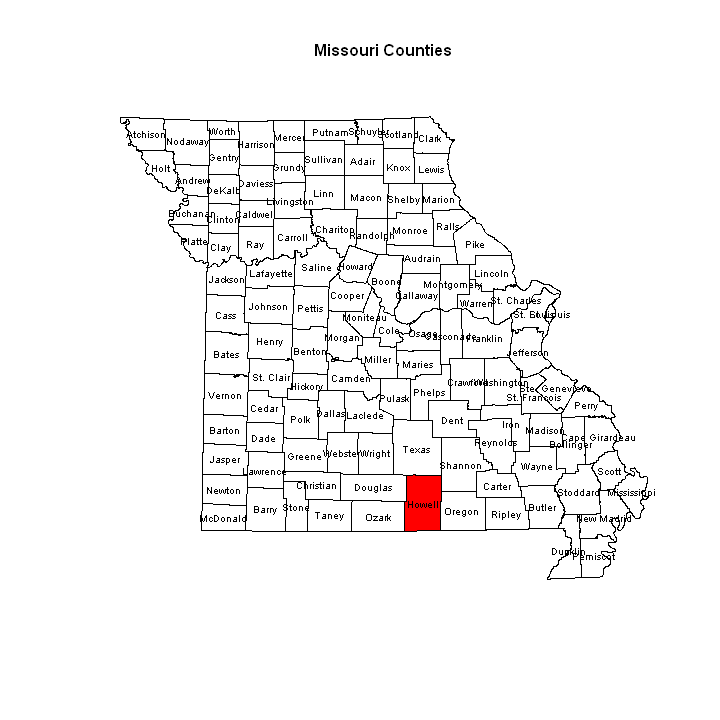

In [13]:
#Display the featureclass
plot(ppolys,col="white",main='Missouri Counties',cex.main=.8)

plot(ppolys[ppolys@data$NAME10 == "Howell",], 
         col="red", add=TRUE,
         main='Missouri Counties',cex.main=.8)

#Get centroid of polygons
centroids <- gCentroid(ppolys, byid=TRUE)
centroidLons <- coordinates(centroids)[,1]
centroidLats <- coordinates(centroids)[,2]

#Label polygons
text(centroidLons, centroidLats, labels=ppolys$NAME10,cex=.5)

In [14]:
howellPoly <- ppolys[ppolys@data$NAME10 == "Howell", ]

In [15]:
#find howell county's index and retrieve its neighborhood
HowellCoID <- row.names(howellPoly)

In [16]:
HowellCoID

[1] "103"

In [17]:
Howellindex = as.numeric(HowellCoID) + 1
Pneighbors <- unlist(ppolys.nb[Howellindex])

In [18]:
Pneighbors

[1]  88  92 102 109 112

In [19]:
ppolys.nb[104]

[[1]]
[1]  88  92 102 109 112

In [20]:
ppolys.nb[103]

[[1]]
[1]  94  97 107 113

In [21]:
head(ppolys.nb)

[[1]]
[1]  3 13 16

[[2]]
[1]  4 14

[[3]]
[1]  1  5 12 13

[[4]]
[1]  2  7 10 14 17

[[5]]
[1]  3  6 12

[[6]]
[1]  5  8 11 12

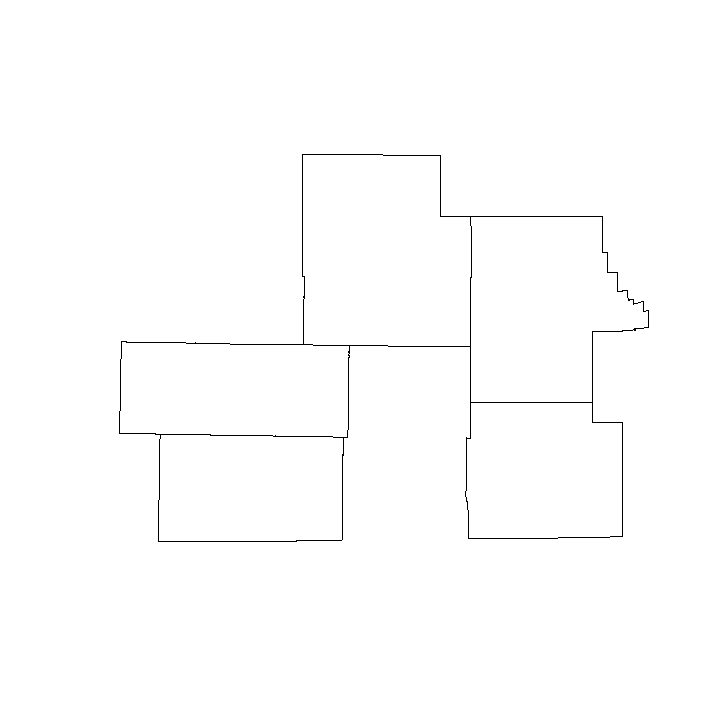

In [22]:
#display howell's neighborhood polygons
selNeighbors <- ppolys[Pneighbors,]
plot(selNeighbors)

### Visualize the Neighborhood Connections

The plot() function can actually help us visualize the neighbors. To do this, the coordinates of the neighbors can be plotted as straight lines on a map as is done below.

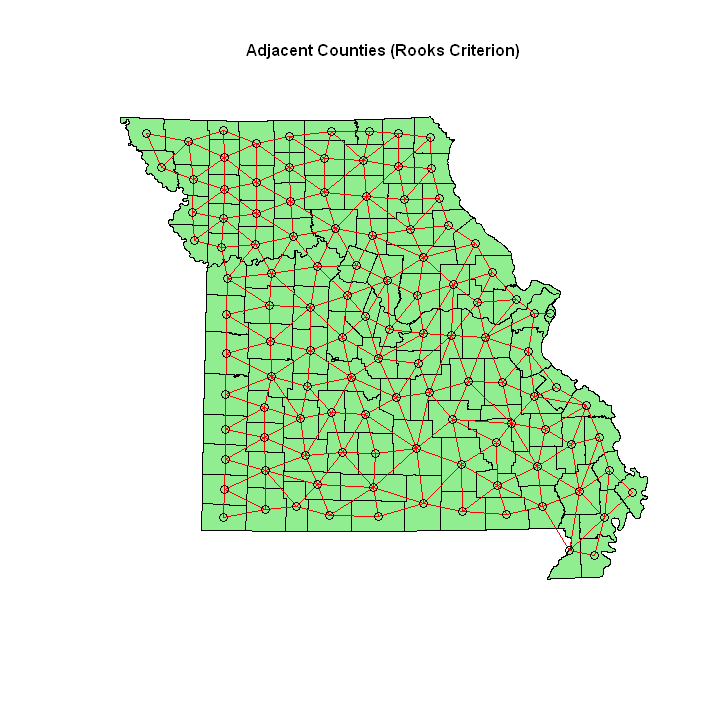

In [23]:
#Map features
plot(ppolys, col = "lightgreen", main = "Adjacent Counties (Rooks Criterion)", cex.main = 0.8)

#Map neighbors
plot(ppolys.nb, coordinates(ppolys), add=TRUE, col="red")

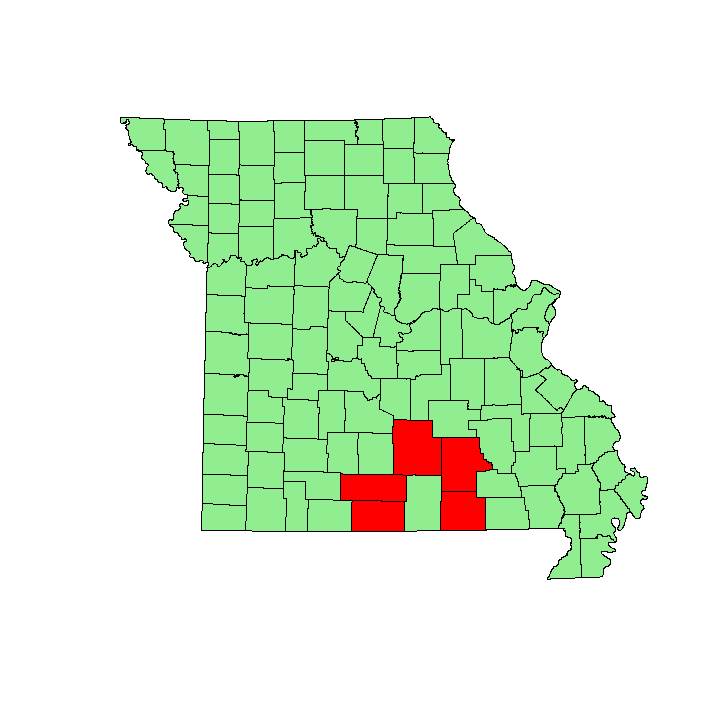

In [24]:
plot(ppolys, col = "lightgreen")
plot(selNeighbors, add = TRUE, col = "red")

Every polygon is represented as a node and the spatial relationships defined between nodes (polygons that share edges or vertices) are rendered as arcs.  Basically what we did was to represent the spatial relationships among polygons in a different, but equivalent manner.  But why bother? Well, as it turns out working with arc/node topologies allows us to take advantage of many mathematical modes of analysis (i.e. statistics, graph theory, etc.).

## Spatial Weights Matrix or 0/1 Contiguity Matrix (C)

We could also render this set as a matrix of values (called a spatial weights matrix or contiguity matrix) in which each row and column represents a polygon and the values in the matrix C[row][col] = {1, if polygon[col] is a neighbor of polygon[row]; 0, otherwise}.  So in the case of Howell County, C[Howell][Ozark] = 1, C[Howell][Texas] = 1, C[Howell][Adair] = 0, C[Howell][Boone] = 0, etc.  Such spatial weights matricies are standard input for many geostatistical models.  To generate a spatial weights matrix in R, the 'nb2mat' function (spdep library) can be used. This function requires a .nb neighborhood object, which was computed earlier. 

In [25]:
#Standard binary continuity matrix format
ppolys.mat <- nb2mat(ppolys.nb, style='B')
head(ppolys.mat)

0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Row-Normalization

Sometimes it is useful to standarize the binary C matrix by the number of 1's in each row - a process otherwise known as row-normalization.

In [27]:
#Row standardized (each row element divided by number of neighbors in row) continuity matrix format
ppolys.mat <- nb2mat(ppolys.nb,style='W')
head(ppolys.mat)

0,0.00,0.0,0.3333333,0.0,0.00,0.0000000,0.0,0.00,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.00,0.0,0.0000000,0.5,0.00,0.0000000,0.0,0.00,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.25,0.0,0.0000000,0.0,0.25,0.0000000,0.0,0.00,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.00,0.2,0.0000000,0.0,0.00,0.0000000,0.2,0.00,0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,0.00,0.0,0.3333333,0.0,0.00,0.3333333,0.0,0.00,0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0.00,0.0,0.0000000,0.0,0.25,0.0000000,0.0,0.25,0,0.0,...,0,0,0,0,0,0,0,0,0,0


Rather than modeling neighborhoods simply based on polygon adjacency, distance-based relationships can also be considered.  For example, the distance between a polygon and its adjacent neighbors may vary.  As such, the relationship between each adjacent neighbor could be weighted by distance to that neighbor.  

In the following example, the 'nbdists' function (spdep library) is first applied to compute distances between the centroids of polygons.  Then, distance can be augmented by some function (i.e. power, exponential, etc.) indicating how some relationship declines with increasing distance.  Next, the .nb object can be converted to a list, in which each neighbor is weighted by its distance to a polygon. What units are these distance measures? Might need to think back to the coordinate reference system lab.

In [28]:
ppolys.nb[1:5]

[[1]]
[1]  3 13 16

[[2]]
[1]  4 14

[[3]]
[1]  1  5 12 13

[[4]]
[1]  2  7 10 14 17

[[5]]
[1]  3  6 12

In [29]:
centroids[1:5]

SpatialPoints:
         x       y
0 607053.3 4474061
1 294043.0 4478407
2 572325.2 4478337
3 340082.6 4469490
4 540610.7 4480061
Coordinate Reference System (CRS) arguments: +proj=utm +zone=15
+datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 

In [30]:
#Compute distance to each neighbor
ndlist <- nbdists(ppolys.nb, coordinates(centroids))

In [31]:
ndlist[1:5]

[[1]]
[1] 34990.42 46849.57 34820.94

[[2]]
[1] 46895.09 41515.79

[[3]]
[1] 34990.42 31761.31 48285.15 36008.00

[[4]]
[1] 46895.09 41291.13 43502.83 40899.95 42450.64

[[5]]
[1] 31761.31 41983.05 31776.79

In [32]:
#Apply some sort of function to distance if desired...i.e. affect decreases with increasing distance
ndlist <- lapply(ndlist,function(x){ x })

ndlist[0:5]

[[1]]
[1] 34990.42 46849.57 34820.94

[[2]]
[1] 46895.09 41515.79

[[3]]
[1] 34990.42 31761.31 48285.15 36008.00

[[4]]
[1] 46895.09 41291.13 43502.83 40899.95 42450.64

[[5]]
[1] 31761.31 41983.05 31776.79

In [33]:
#Convert to neighborhood list
ppolys.nd.w.d <- nb2listw(ppolys.nb, style = 'B', glist = ndlist)

ppolys.nd.w.d

Characteristics of weights list object:
Neighbour list object:
Number of regions: 115 
Number of nonzero links: 588 
Percentage nonzero weights: 4.446125 
Average number of links: 5.113043 

Weights style: B 
Weights constants summary:
    n    nn       S0          S1          S2
B 115 13225 25916155 2.37214e+12 2.60245e+13

In [34]:
names(ppolys.nd.w.d)

[1] "style"      "neighbours" "weights"

In [35]:
ppolys.nd.w.d$weights[0:5]

[[1]]
[1] 34990.42 46849.57 34820.94

[[2]]
[1] 46895.09 41515.79

[[3]]
[1] 34990.42 31761.31 48285.15 36008.00

[[4]]
[1] 46895.09 41291.13 43502.83 40899.95 42450.64

[[5]]
[1] 31761.31 41983.05 31776.79

## Higher order neighbors (spatial lags)
What if we'd like to define the neighborhood of a polygon (polygon A) as the set of polygons that share an edge with polygon A (refer to these as set A1) as well as the polygons that share an edge with polygons in set A1 (refer to these as set A2)?  These hierarchical neighborhoods are often referred to as orders (1st order or 2nd order neighborhoods in this example) or as spatial lags.

### Referencing Higher Order Neighbors

What if the 2nd order neighbors of Howell County were needed?  Some basic set operations can do the trick. First, select the neighbors of Howell County. Next, iterate over the neighborhoods of the neighbors. Track if any new polygons are encounted other than those in Howell's neighborhood.

In [36]:
#find howell county's index and retrieve its neighborhood
HowellCoID <- row.names(ppolys[ppolys@data$NAME10 == 'Howell',])
Howellindex <- as.numeric(HowellCoID) + 1
Pneighbors  <- unlist(ppolys.nb[Howellindex])

In [37]:
HowellCoID

[1] "103"

In [38]:
Howellindex

[1] 104

In [39]:
Pneighbors

[1]  88  92 102 109 112

In [40]:
Pneighbors  <- append(Pneighbors, Howellindex)

In [41]:
Pneighbors

[1]  88  92 102 109 112 104

In [42]:
Sneighbors <- c()

In [43]:
for (ci in Pneighbors) {
    print(paste("ci:", ci))    
    
    cc <- unlist(ppolys.nb[as.numeric(ci)])
    print(paste("ppolys.nb[as.numeric(ci):", ppolys.nb[as.numeric(ci)]))
    print(paste("cc:", cc))
    
    kk <- setdiff(cc,Pneighbors)
    print(paste("kk:", kk))
    Sneighbors <- append(Sneighbors,kk)
    print(paste("Sneighbors:", Sneighbors))
    print("==================")
}

[1] "ci: 88"
[1] "ppolys.nb[as.numeric(ci): c(70, 75, 79, 81, 91, 92, 102, 104)"
[1] "cc: 70"  "cc: 75"  "cc: 79"  "cc: 81"  "cc: 91"  "cc: 92"  "cc: 102"
[8] "cc: 104"
[1] "kk: 70" "kk: 75" "kk: 79" "kk: 81" "kk: 91"
[1] "Sneighbors: 70" "Sneighbors: 75" "Sneighbors: 79" "Sneighbors: 81"
[5] "Sneighbors: 91"
[1] "=================="
[1] "ci: 92"
[1] "ppolys.nb[as.numeric(ci): c(81, 87, 88, 100, 104, 109)"
[1] "cc: 81"  "cc: 87"  "cc: 88"  "cc: 100" "cc: 104" "cc: 109"
[1] "kk: 81"  "kk: 87"  "kk: 100"
[1] "Sneighbors: 70"  "Sneighbors: 75"  "Sneighbors: 79"  "Sneighbors: 81" 
[5] "Sneighbors: 91"  "Sneighbors: 81"  "Sneighbors: 87"  "Sneighbors: 100"
[1] "=================="
[1] "ci: 102"
[1] "ppolys.nb[as.numeric(ci): c(88, 90, 91, 101, 104, 111, 112)"
[1] "cc: 88"  "cc: 90"  "cc: 91"  "cc: 101" "cc: 104" "cc: 111" "cc: 112"
[1] "kk: 90"  "kk: 91"  "kk: 101" "kk: 111"
 [1] "Sneighbors: 70"  "Sneighbors: 75"  "Sneighbors: 79"  "Sneighbors: 81" 
 [5] "Sneighbors: 91"  "Sneighbors: 81" 

In [44]:
Sneighbors <- unique(Sneighbors)
Sneighbors

[1]  70  75  79  81  91  87 100  90 101 111 110

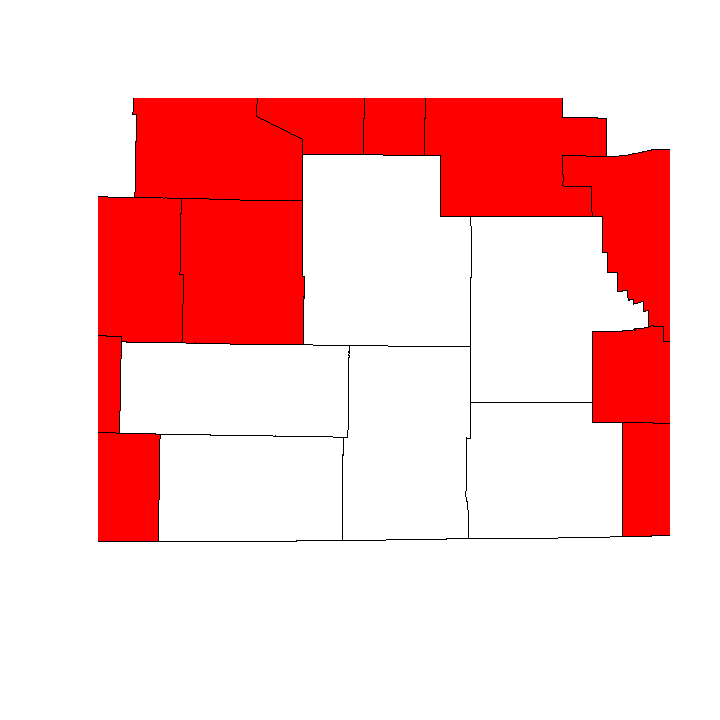

In [45]:
#display howell's neighborhood polygons
FirstNeighbors <- ppolys[Pneighbors ,]
plot(FirstNeighbors)

#display howell's second order neighbors
SecondNeighbors <- ppolys[Sneighbors,]
plot(SecondNeighbors, add=TRUE,col='red')

###  Higher Order Neighborhoods

Fortunately, spdep has some function that make obtaining higher order neighborhoods even easier. For example, the nblag() function can take a nb class object and use it to generate higher order neighborhood. Below, the function is applied to generate neighborhoods up to the 2nd order. The resulting lists can be queried to retrieve the 1st order neighbors which are indexed as element 1 and the 2nd order which are indexed as element 2.  Alternatively, the nblag_cumul() function combines all neighborhoods into a single list.

In [46]:
#create a higher order neighborhood
maxlag <- 2
ppolys.lag <- nblag(ppolys.nb, 2)

In [47]:
ppolys.lag

[[1]]
Neighbour list object:
Number of regions: 115 
Number of nonzero links: 588 
Percentage nonzero weights: 4.446125 
Average number of links: 5.113043 

[[2]]
Neighbour list object:
Number of regions: 115 
Number of nonzero links: 1064 
Percentage nonzero weights: 8.045369 
Average number of links: 9.252174 

attr(,"call")
nblag(neighbours = ppolys.nb, maxlag = 2)

In [48]:
ppolys.cuml <- nblag_cumul(ppolys.lag)

ppolys.cuml[1:5]

[[1]]
[1]  3  5 12 13 16 20 23 24

[[2]]
[1]  4  7 10 14 17

[[3]]
 [1]  1  5  6 11 12 13 16 20 21 23

[[4]]
[1]  2  7  9 10 14 17 18 19 25

[[5]]
[1]  1  3  6  8 11 12 13 20 21

In [49]:
#look at results
paste('first order')
head(ppolys.lag[[1]])
paste('second order')
head(ppolys.lag[[2]])
paste('first and second order')
head(ppolys.cuml)

[1] "first order"

[[1]]
[1]  3 13 16

[[2]]
[1]  4 14

[[3]]
[1]  1  5 12 13

[[4]]
[1]  2  7 10 14 17

[[5]]
[1]  3  6 12

[[6]]
[1]  5  8 11 12

[1] "second order"

[[1]]
[1]  5 12 20 23 24

[[2]]
[1]  7 10 17

[[3]]
[1]  6 11 16 20 21 23

[[4]]
[1]  9 18 19 25

[[5]]
[1]  1  8 11 13 20 21

[[6]]
[1]  3  9 13 15 20 21

[1] "first and second order"

[[1]]
[1]  3  5 12 13 16 20 23 24

[[2]]
[1]  4  7 10 14 17

[[3]]
 [1]  1  5  6 11 12 13 16 20 21 23

[[4]]
[1]  2  7  9 10 14 17 18 19 25

[[5]]
[1]  1  3  6  8 11 12 13 20 21

[[6]]
 [1]  3  5  8  9 11 12 13 15 20 21

### Mapping Higher Order Neighborhoods

Just as was done earlier, the neighborhoods can be plotted by drawing a line between the polygon centroids in cases where they are neighbors of some sort.

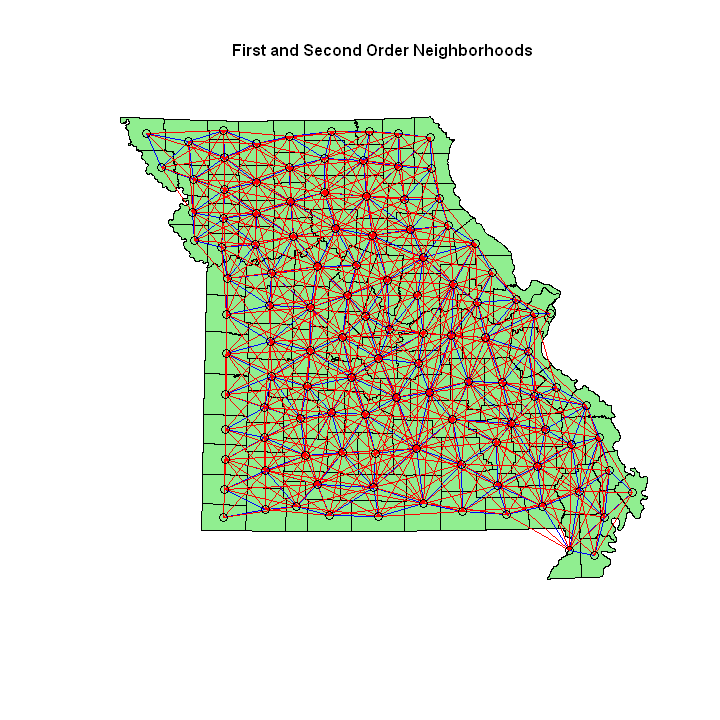

In [50]:
#Map shp file
plot(ppolys, col="lightgreen", 
             main="First and Second Order Neighborhoods", cex.main=.8)

#Map the higher order neighbors
plot(ppolys.lag[[1]], coordinates(ppolys), add=TRUE, col="blue")
plot(ppolys.lag[[2]], coordinates(ppolys), add=TRUE, col="red")